### Business Case: Aerofit - Descriptive Statistics & Probability
- There is no right or wrong answer. We have to get used to dealing with uncertainty in business. This is exactly the skill we want to develop.

#### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem

- The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### What good looks like?
```
Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
Check correlation among different factors using heat maps or pair plots.
With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
Customer Profiling - Categorization of users.
Probability- marginal, conditional probability.
Some recommendations and actionable insights, based on the inferences.
```

### Dataset description
```
Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:
The KP281 is an entry-level treadmill that sells for $1,500.
The KP481 is for mid-level runners that sell for $1,750.
The KP781 treadmill is having advanced features that sell for $2,500.
```

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df  = pd.read_csv('aerofit_treadmill.csv')
df1 = df.copy()
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [114]:
df1.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

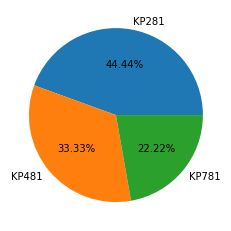

In [115]:
per = df1['Product'].value_counts()
plt.pie(per,labels = ['KP281', 'KP481', 'KP781'], autopct= '%0.2f%%')
# plt.savefig('products&percentage')
plt.show()

### Correlation check

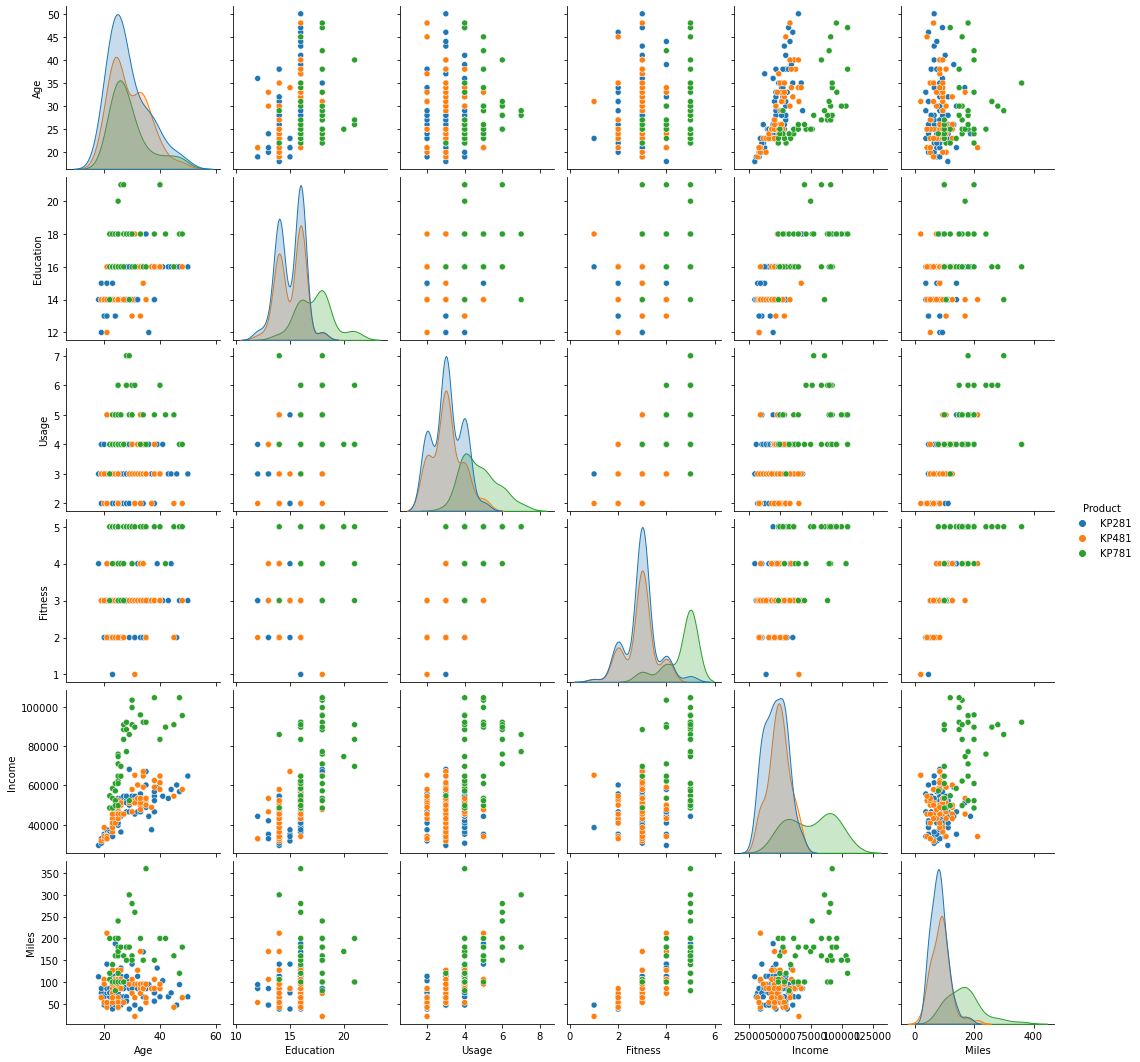

In [18]:
sns.pairplot(data = df1, hue = 'Product')
plt.show()

In [27]:
x = df1.corr()
x

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


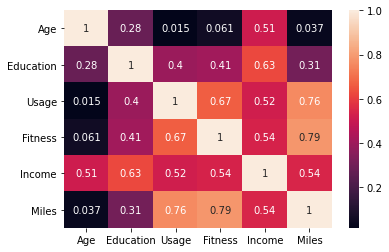

In [96]:
sns.heatmap(data = x, annot = True)
plt.show()

### Recommendation of Trademill type based on factor Education, Income,, Age.

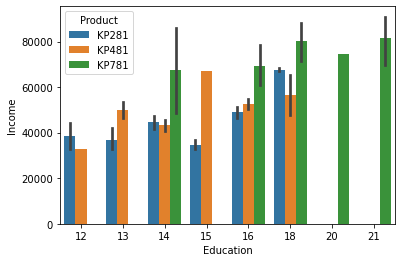

In [32]:
sns.barplot(data = df1, x = 'Education', y = 'Income', hue = 'Product')
plt.show()

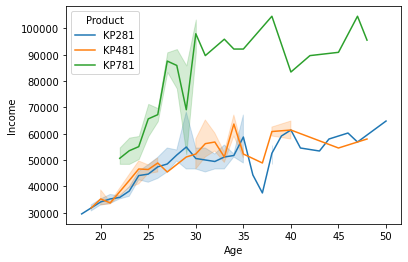

In [97]:
sns.lineplot(data = df1, x = 'Age', y = 'Income', hue = 'Product')
# plt.savefig('income&price')
plt.show()

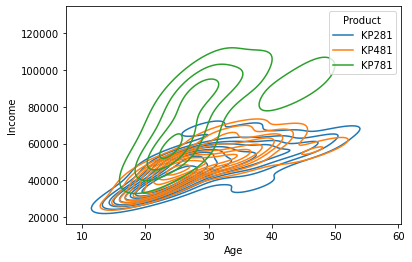

In [91]:
sns.kdeplot(data = df1, x = 'Age', y = 'Income', hue = 'Product')
plt.show()

In [38]:
df1['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

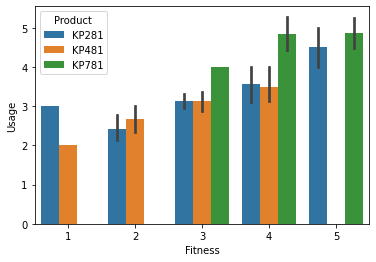

In [44]:
sns.barplot(data = df1, x = 'Fitness', y = 'Usage', hue = 'Product')
plt.show()

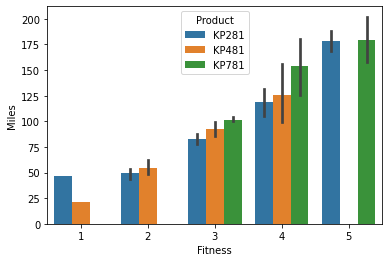

In [98]:
sns.barplot(data = df1, x = 'Fitness', y = 'Miles', hue = 'Product')
# plt.savefig('fitness&miles')
plt.show()

<AxesSubplot:xlabel='Product', ylabel='Miles'>

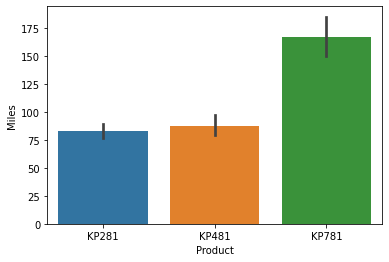

In [50]:
sns.barplot(data = df1, x = 'Product', y = 'Miles')

<AxesSubplot:xlabel='Product', ylabel='Usage'>

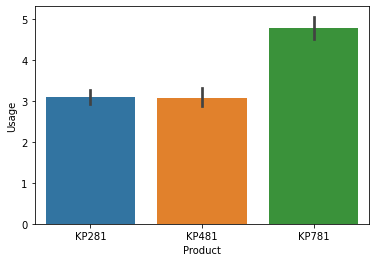

In [52]:
sns.barplot(data = df1, x = 'Product', y = 'Usage')

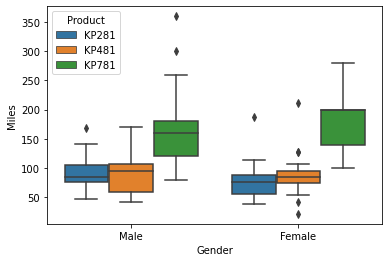

In [55]:
sns.boxplot(data = df1, x = 'Gender', y = 'Miles', hue = 'Product')
plt.show()

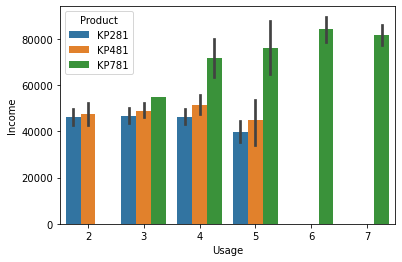

In [57]:
sns.barplot(data = df1, x = 'Usage', y = 'Income', hue = 'Product')
plt.show()

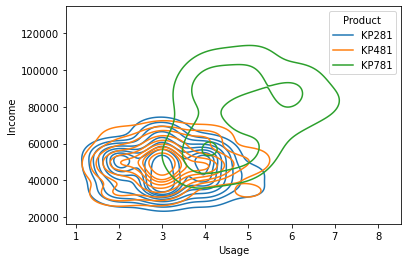

In [94]:
sns.kdeplot(data = df1, x = 'Usage', y = 'Income', hue = 'Product')
plt.show()

In [60]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [86]:
# find the average of Age between 25 and 40
ans = df1.loc[(df1['Age'] > 24) & (df1['Age'] < 41)]
ans['Age'].sum()/len(ans)

30.166666666666668

In [84]:
pd.crosstab(df1['Age'], [df1['Income'], df1['Product']])

Income  29562  30699  31836        32973        34110        35247  36384   \
Product  KP281  KP281  KP281 KP481  KP281 KP481  KP281 KP481  KP281  KP281   
Age                                                                          
18           1      0      0     0      0     0      0     0      0      0   
19           0      1      1     1      1     0      0     0      0      0   
20           0      0      0     0      1     1      0     1      1      0   
21           0      0      0     0      1     1      0     2      2      0   
22           0      0      0     0      0     0      0     0      2      2   
23           0      0      0     0      0     0      2     0      0      0   
24           0      0      0     0      0     0      0     0      0      0   
25           0      0      0     0      0     0      0     0      0      0   
26           0      0      0     0      0     0      0     0      0      1   
27           0      0      0     0      0     0      0     0      0      0   
28           0      0      0     0      0     0      0     0      0      0   
29           0      0      0     0      0     0      0     0      0      0   
30           0      0      0     0      0     0      0     0      0      0   
31           0      0      0     0      0     0      0     0      0      0   
32           0      0      0     0      0     0      0     0      0      0   
33           0      0      0     0      0     0      0     0      0      0   
34           0      0      0     0      0     0      0     0      0      0   
35           0      0      0     0      0     0      0     0      0      0   
36           0      0      0     0      0     0      0     0      0      0   
37           0      0      0     0      0     0      0     0      0      0   
38           0      0      0     0      0     0      0     0      0      0   
39           0      0      0     0      0     0      0     0      0      0   
40           0      0      0     0      0     0      0     0      0      0   
41           0      0      0     0      0     0      0     0      0      0   
42           0      0      0     0      0     0      0     0      0      0   
43           0      0      0     0      0     0      0     0      0      0   
44           0      0      0     0      0     0      0     0      0      0   
45           0      0      0     0      0     0      0     0      0      0   
46           0      0      0     0      0     0      0     0      0      0   
47           0      0      0     0      0     0      0     0      0      0   
48           0      0      0     0      0     0      0     0      0      0   
50           0      0      0     0      0     0      0     0      0      0   

Income   ... 85906  88396  89641  90886  92131  95508  95866  99601  103336  \
Product  ...  KP781  KP781  KP781  KP781  KP781  KP781  KP781  KP781  KP781   
Age      ...                                                                  
18       ...      0      0      0      0      0      0      0      0      0   
19       ...      0      0      0      0      0      0      0      0      0   
20       ...      0      0      0      0      0      0      0      0      0   
21       ...      0      0      0      0      0      0      0      0      0   
22       ...      0      0      0      0      0      0      0      0      0   
23       ...      0      0      0      0      0      0      0      0      0   
24       ...      0      0      0      0      0      0      0      0      0   
25       ...      0      0      0      0      0      0      0      0      0   
26       ...      0      0      0      0      0      0      0      0      0   
27       ...      0      1      0      1      0      0      0      0      0   
28       ...      0      1      0      0      1      0      0      0      0   
29       ...      1      0      0      0      0      0      0      0      0   
30       ...      0      0      0      1      0      0      0      1      1   
31   